# Iris Flower Classification

## Import the required packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # data visualization library
import matplotlib.pyplot as plt # for creating static, animated, and interactive visualizations

## Load the Dataset

In [2]:
df = pd.read_csv("D:\CognoRise InfoTech\IRIS.csv")

In [3]:
iris = df.copy()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()
iris.species.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [5]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


## **Visualization**

<Figure size 800x600 with 0 Axes>

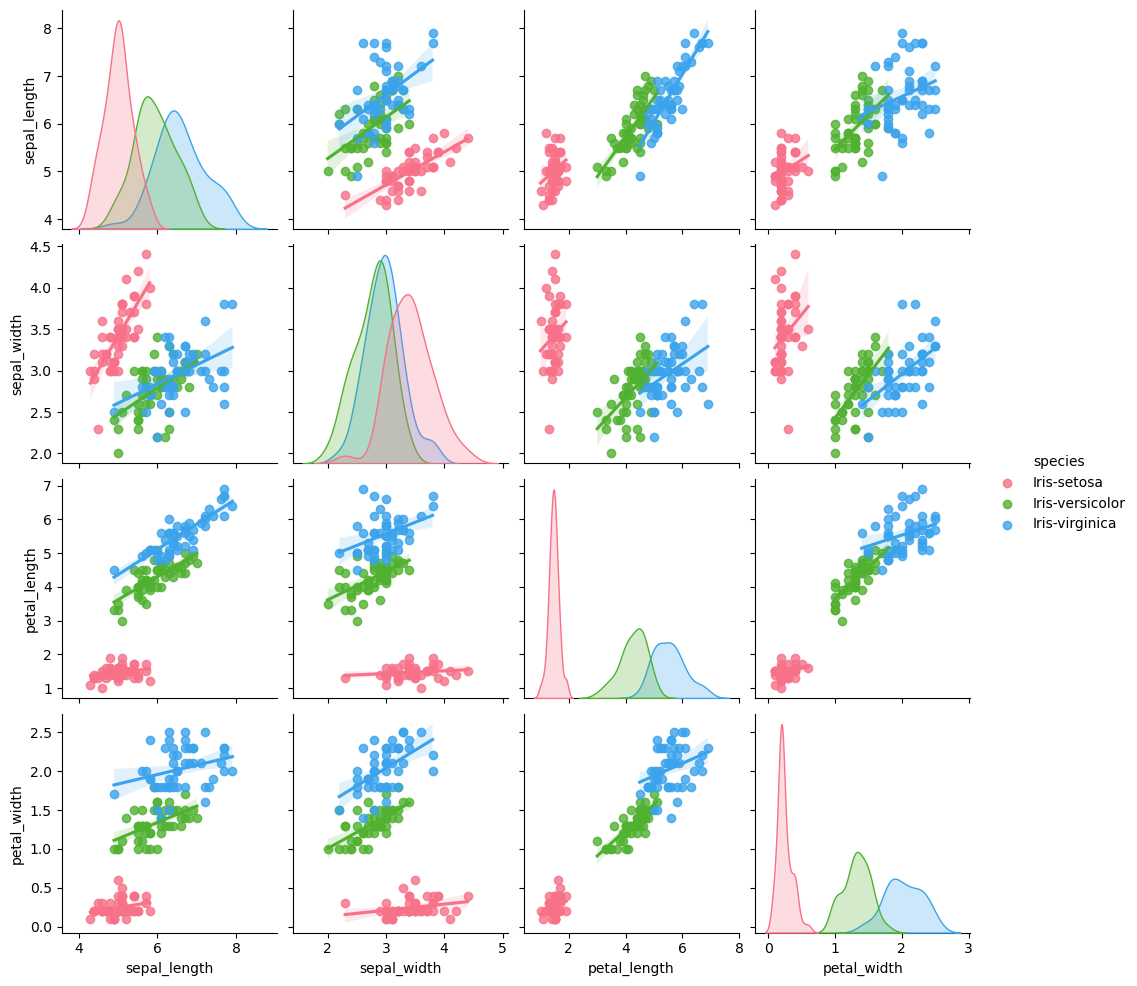

In [6]:
plt.figure(figsize=(8,6));
sns.pairplot(iris,kind='reg',hue ='species',palette="husl" );

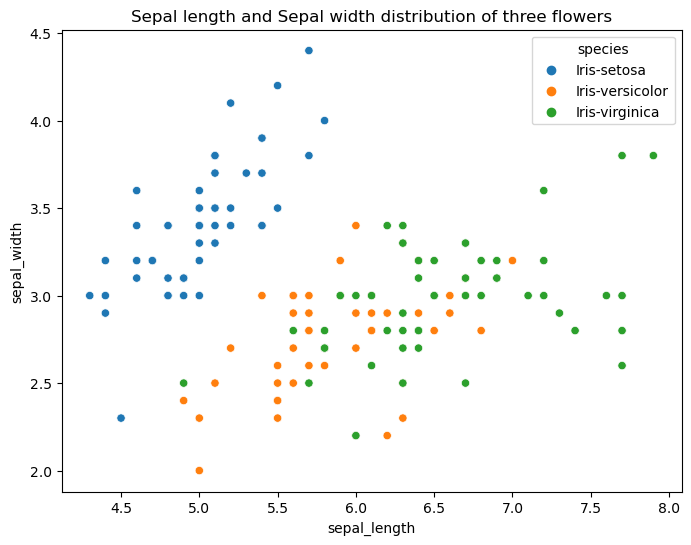

In [7]:
plt.figure(figsize=(8,6));
sns.scatterplot(x=iris.sepal_length,y=iris.sepal_width,hue=iris.species).set_title("Sepal length and Sepal width distribution of three flowers");

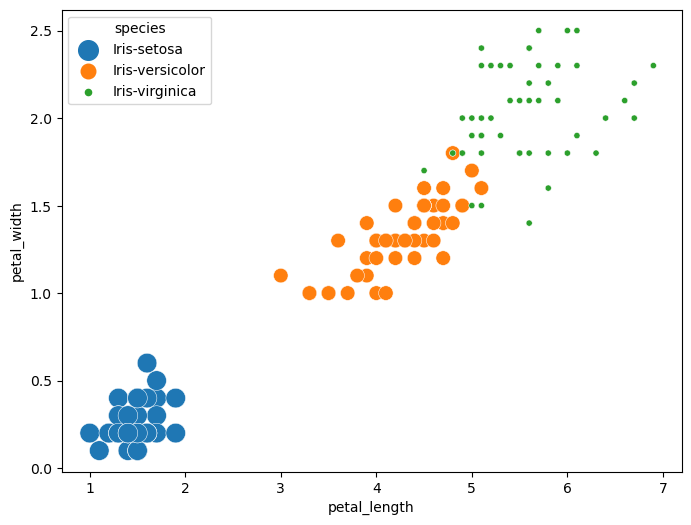

In [8]:
plt.figure(figsize=(8,6));
cmap = sns.cubehelix_palette(dark=.5, light=.9, as_cmap=True)
ax = sns.scatterplot(x="petal_length", y="petal_width",hue="species",size="species",sizes=(20,200),legend="full",data=iris);

## Creating ML classify Models

In [9]:
#Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
iris['species'] = lb_make.fit_transform(iris['species'])
iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
109,7.2,3.6,6.1,2.5,2
22,4.6,3.6,1.0,0.2,0
127,6.1,3.0,4.9,1.8,2


In [10]:
# # PCA ===> if data consist of too many parameters/variables(columns) then we need to use PCA; in this data it is not necessary
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2,whiten = True) #whitten = normalize
# pca.fit(iris)
# x_pca = pca.transform(iris)

In [11]:
# Importing metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [12]:
y = iris.species
X = iris.drop('species',axis = 1)

In [13]:
#Train and Test split,cross_val,k-fold
from sklearn.model_selection import KFold,train_test_split,cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

## KNN Model

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_pred = knn.predict(X_test)

## Summary of the predictions

In [17]:
# Summary of the predictions made by the KNN
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


## Accuracy score

In [18]:
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.9777777777777777
